<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [13]:
!pip install seaborn --upgrade

import pandas as pd
import seaborn as sns

Load the dataset into a dataframe.


In [14]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:>

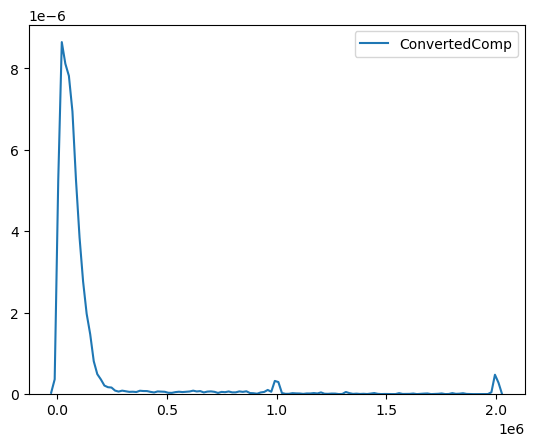

In [16]:
# plot distribution curve using seaborn
sns.kdeplot(df['ConvertedComp'])

Plot the histogram for the column `ConvertedComp`.


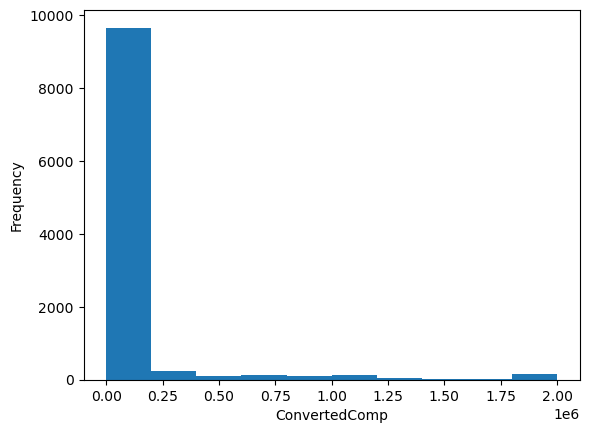

In [19]:
# your code goes here
import matplotlib.pyplot as plt

# plot histogram using matplotlib
plt.hist(df['ConvertedComp'], bins=10)
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [57]:
# your code goes here
print("Median of ConvertedComp is:", df['ConvertedComp'].median())
print("Median of Age is:", df['Age'].median())

Median of ConvertedComp is: 57745.0
Median of Age is: 29.0


How many responders identified themselves only as a **Man**?


In [67]:
# your code goes here
df_Gender = df['Gender'].value_counts()
df_Gender
#gender = df_Gender.index
#counts = df_Gender.values

#print(counts[0],"responders identified themselves as a", gender[0])

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [71]:
# your code goes here
print(counts[1],"responders identified themselves as a", gender[1])

df_w = df[(df['Gender'] == "Woman") | (df['Gender'] == "Woman;Man") | (df['Gender'] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")]
df_w['ConvertedComp'].median()

731 responders identified themselves as a Woman


57287.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [43]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


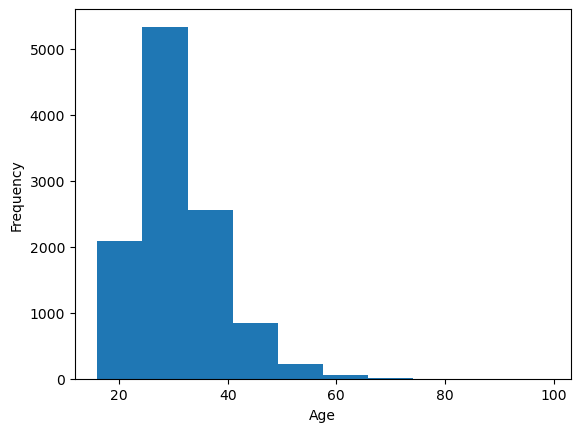

In [44]:
# your code goes here
plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


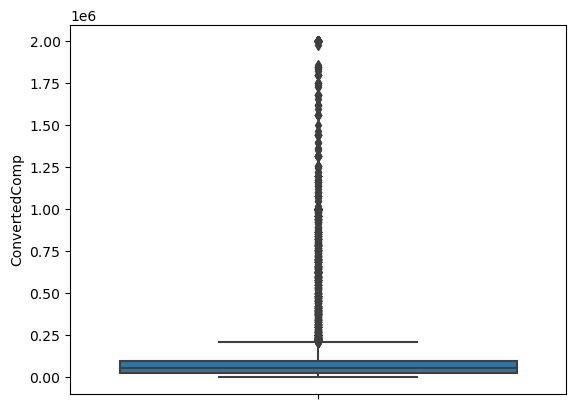

In [46]:
# your code goes here
# create a box plot of the 'ConvertedComp' column using seaborn
sns.boxplot(y=df['ConvertedComp'])

# display the plot
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [47]:
# your code goes here
# obtain the 25th and 75th percentiles for the 'ConvertedComp' column
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# calculate the interquartile range (IQR)
iqr = q3 - q1

# print the IQR
print('Interquartile Range (IQR):', iqr)

Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [48]:
# your code goes here
# calculate the lower and upper bounds
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# print the lower and upper bounds
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [49]:
# your code goes here
# count the number of outliers in the 'ConvertedComp' column
num_outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)].shape[0]

# print the number of outliers
print('Number of Outliers:', num_outliers)

Number of Outliers: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


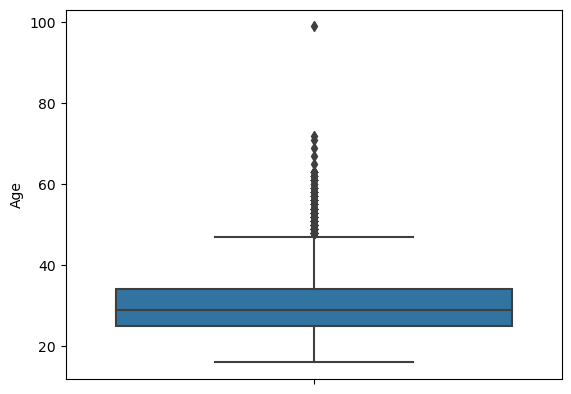

59883.20838915799

In [77]:
# your code goes here
# create a new DataFrame by removing the outliers in the 'ConvertedComp' column
new_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

new_df_w = new_df[(new_df['Gender'] == "Woman")]
new_df_w['ConvertedComp'].median()
new_df['ConvertedComp'].median()

# create a box plot of the 'ConvertedComp' column using seaborn
sns.boxplot(y=new_df['Age'])

# display the plot
plt.show()

new_df['ConvertedComp'].mean()

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [55]:
# your code goes here
correlations = df.corrwith(df['Age'])
print(correlations)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
